In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/set.csv", index_col="Date", parse_dates=True)
df = df["2018":]

In [36]:
short_window=10
long_window=30
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

#Assign signal after short_window
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

#Difference between current row comparing with previous row., this will generate -1 signal
signals['positions'] = signals['signal'].diff()

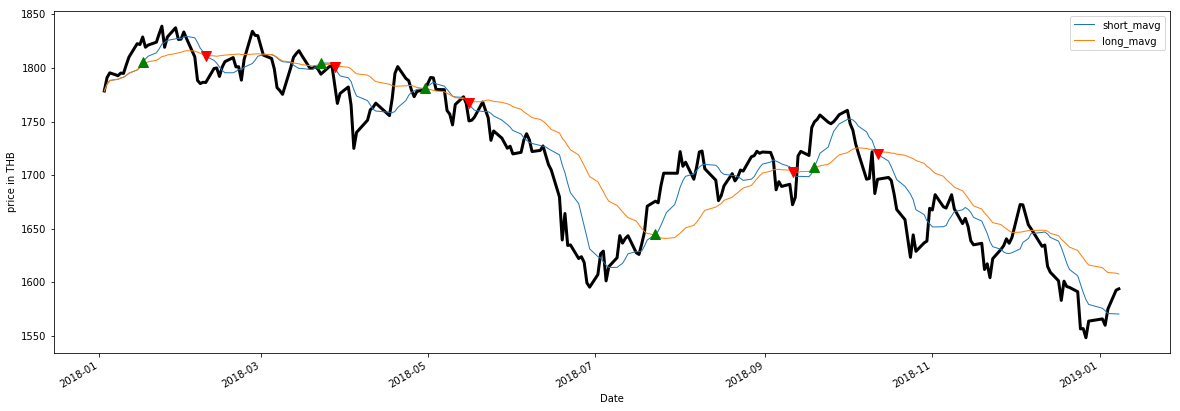

In [37]:
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(111, ylabel="price in THB")
df['Close'].plot(ax=ax1, color='black', lw=3.)
signals[['short_mavg','long_mavg']].plot(ax=ax1, lw=1.)
ax1.plot(signals.loc[signals.positions==1.0].index,
            signals.short_mavg[signals.positions==1.0],'^', markersize=10, color='g')
ax1.plot(signals.loc[signals.positions==-1.0].index,
            signals.short_mavg[signals.positions==-1.0],'v', markersize=10, color='r')
plt.show()